In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
sys.path.append("/home/aalves/mute")
import mute.constants as mtc
import mute.underground as mtu
import pickle
from matplotlib import cm
from matplotlib.colors import Normalize

In [2]:
input_file = f'/data/user/aalves/mute_output/underground/underground_fluxes_SIBYLL2.3c_GSF_2012_5.pkl'

with open(input_file, 'rb') as f:
    data = pickle.load(f)
print(data)

slant_depths = data['slant_depths']
energies = data['energies']
fluxes = data['fluxes']
s_zenith_angles = data['surface_zenith_angles']

print(slant_depths.shape)
print(energies.shape)
print(s_zenith_angles.shape)
print(fluxes.shape)

energy_bins_width = energies[1:]-energies[:-1]
energy_centers = (energies[1:]+energies[:-1])/2

{'slant_depths': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. ]), 'energies': array([8.91250938e+01, 1.12201845e+02, 1.41253754e+02, 1.77827941e+02,
       2.23872114e+02, 2.81838293e+02, 3.54813389e+02, 4.46683592e+02,
       5.62341325e+02, 7.07945784e+02, 8.91250938e+02, 1.12201845e+03,
       1.41253754e+03, 1.77827941e+03, 2.23872114e+03, 2.81838293e+03,
       3.54813389e+03, 4.46683592e+03, 5.62341325e+03, 7.07945784e+03,
       8.91250938e+03, 1.12201845e+04, 1.41253754e+04, 1.77827941e+04,
       2.23872114e+04, 2.81838293e+04, 3.54813389e+04, 4.46683592e+04,
       5.62341325e+04, 7.07945784e+04, 8.91250938e+04, 1.12201845e+05,
       1.41253754e+05, 1.77827941e+05, 2.23872114e+05, 2.81838293e+05,
       3.54813389e+05, 4.46683592e+05, 5.62341325e+05, 7.07945784e+05,
       8.91250938e+05, 1.12201845e+06, 1.41253754e+06, 1.77827941e+06,

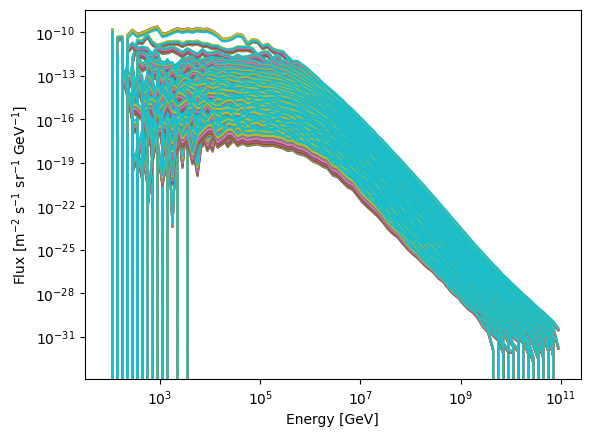

In [3]:
for j, slant_depth in enumerate(slant_depths):
    for i, zenith_angle in enumerate(s_zenith_angles):
        if i == 0:
            plt.plot(energies, fluxes[j,:,i], label=f'{slant_depth:.2f}')
        else:
            plt.plot(energies, fluxes[j,:,i])
plt.xlabel('Energy [GeV]')
plt.ylabel('Flux [m$^{-2}$ s$^{-1}$ sr$^{-1}$ GeV$^{-1}$]')
#plt.legend(title='Slant depth [g/cm$^2$]')
plt.xscale('log')
plt.yscale('log')
plt.show()

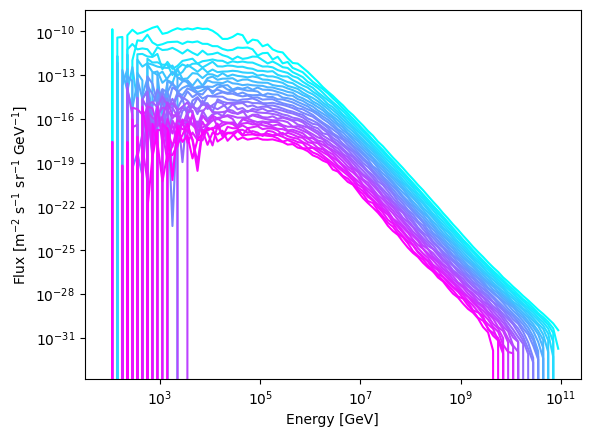

In [4]:
# Create a colormap and normalize
cmap = cm.cool  # Choose a colormap
norm = Normalize(vmin=0, vmax=len(slant_depths) - 1)  # Normalize for slant_depths indices

for j, slant_depth in enumerate(slant_depths):
    plt.plot(energies, np.sum(fluxes[j,:,:], axis=-1)*0.1, color = cmap(norm(j)), label=f'{slant_depth:.2f}')
plt.xlabel('Energy [GeV]')
plt.ylabel('Flux [m$^{-2}$ s$^{-1}$ sr$^{-1}$ GeV$^{-1}$]')
#plt.legend(title='Slant depth [g/cm$^2$]')
plt.xscale('log')
plt.yscale('log')
plt.show()

(28, 90)
(28,)


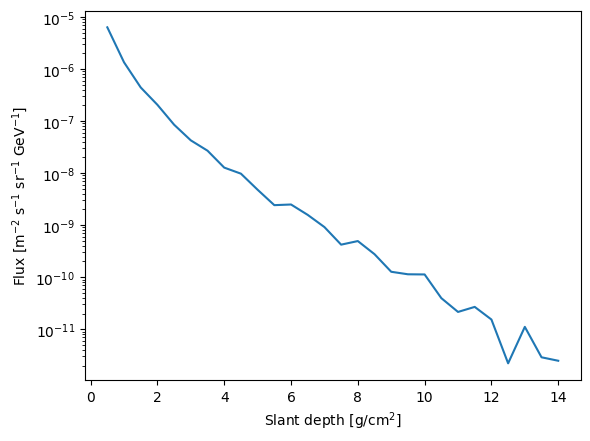

In [ ]:
flux_per_energy = np.sum(fluxes[:,:,:], axis=2)*0.1
flux_per_energy_center = np.zeros((len(slant_depths), len(energies)-1))
for e in range(len(energies)-1):
    flux_per_energy_center[:,e] = (flux_per_energy[:,e] + flux_per_energy[:,e+1])/2 * energy_bins_width[e]
flux_per_slant_depth = np.sum(flux_per_energy_center, axis=1)
plt.plot(slant_depths, flux_per_slant_depth)
plt.xlabel('Slant depth [g/cm$^2$]')
plt.ylabel('Flux [m$^{-2}$ s$^{-1}$ sr$^{-1}$ GeV$^{-1}$]')
#plt.xscale('log')
plt.yscale('log')
plt.show()

In [1]:
print("Hello world")

Hello world
